In [ ]:
# Import basic packages

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, untar = True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


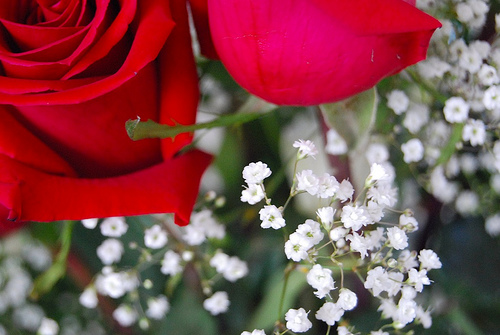

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

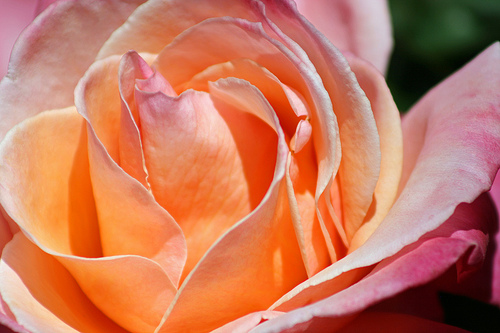

In [ ]:
PIL.Image.open(str(roses[1]))

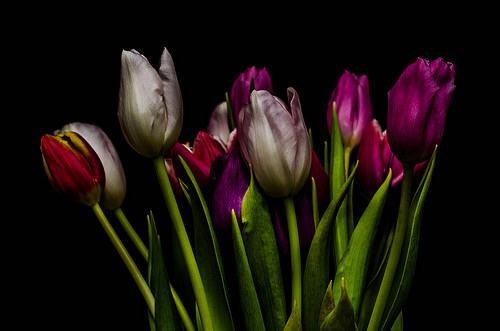

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

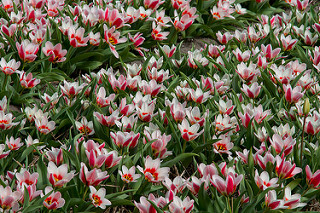

In [ ]:
PIL.Image.open(str(tulips[1]))

# Dataset Creation

In [ ]:
# Create the dataset

batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Splitting the data into train and validation set
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    seed = 42,
    validation_split=0.2,
    subset = 'training'
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    seed = 42,
    validation_split=0.2,
    subset = 'validation'
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Data Visualization

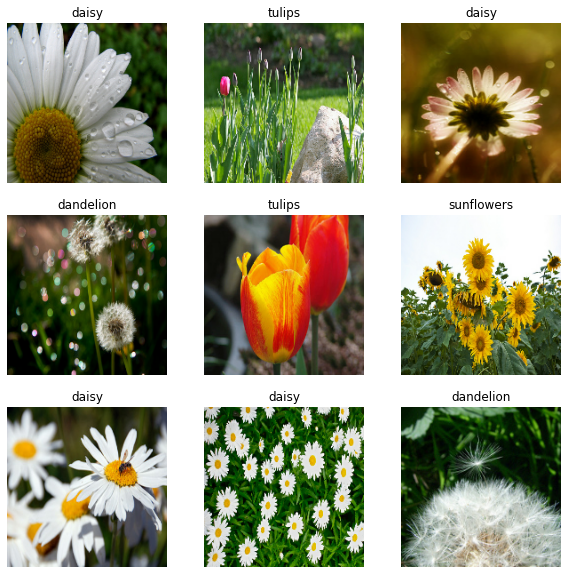

In [ ]:
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Configure Dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

# Standardize the data

In [ ]:
normalization_layer = layers.Rescaling(scale=1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.97872555


# Basic Keras Model

In [ ]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(scale=1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs = 10
history = model.fit(
    x = train_ds,
    validation_data=val_ds,
    epochs = epochs
    )

Epoch 1/10
92/92 [==============================] - 98s 1s/step - loss: 1.3595 - accuracy: 0.4292 - val_loss: 1.0670 - val_accuracy: 0.5300
Epoch 2/10
92/92 [==============================] - 95s 1s/step - loss: 1.0293 - accuracy: 0.6005 - val_loss: 0.9574 - val_accuracy: 0.6117
Epoch 3/10
92/92 [==============================] - 93s 1s/step - loss: 0.8121 - accuracy: 0.6890 - val_loss: 0.9940 - val_accuracy: 0.6226
Epoch 4/10
92/92 [==============================] - 94s 1s/step - loss: 0.6045 - accuracy: 0.7830 - val_loss: 0.9755 - val_accuracy: 0.6417
Epoch 5/10
92/92 [==============================] - 93s 1s/step - loss: 0.4198 - accuracy: 0.8481 - val_loss: 1.1727 - val_accuracy: 0.6199
Epoch 6/10
92/92 [==============================] - 94s 1s/step - loss: 0.2596 - accuracy: 0.9121 - val_loss: 1.5716 - val_accuracy: 0.5995
Epoch 7/10
92/92 [==============================] - 94s 1s/step - loss: 0.1462 - accuracy: 0.9547 - val_loss: 1.7023 - val_accuracy: 0.6240
Epoch 8/10
92/92 [==

# Visualize training results

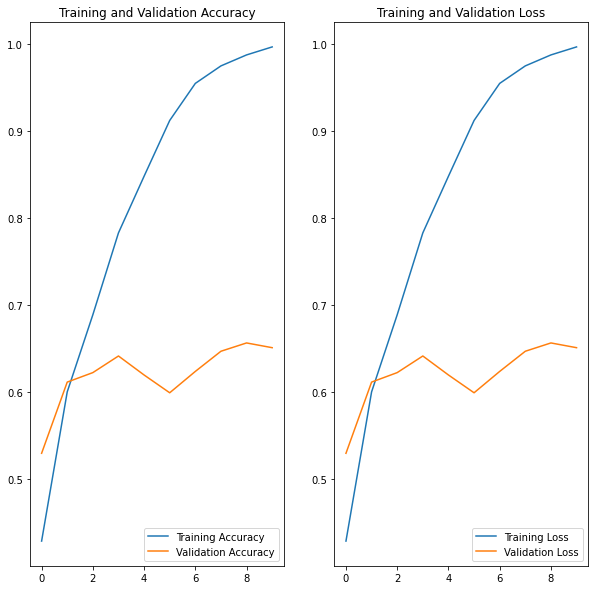

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, acc, label = 'Training Loss')
plt.plot(epochs_range, val_acc, label = 'Validation Loss')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Loss')
plt.show()

# Data Augmentation

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal',
                      input_shape = (img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

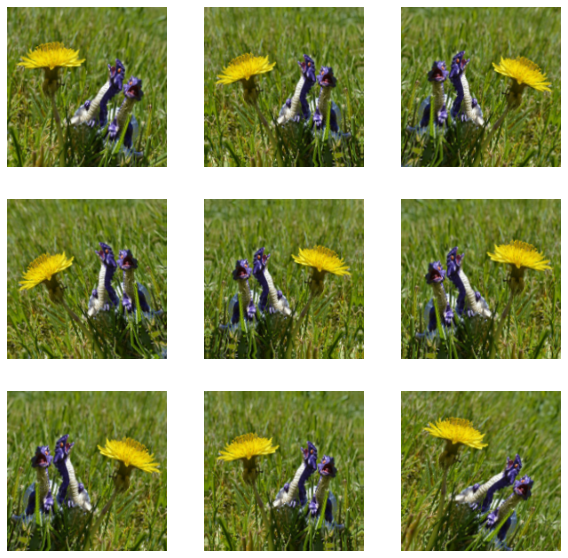

In [ ]:
# Visualize the augmentated images

plt.figure(figsize=(10,10))

for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
# Retrain the model using dropout and augmentation

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(scale=1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 10
history = model.fit(
    x = train_ds,
    validation_data=val_ds,
    epochs = epochs
    )

Epoch 1/10
92/92 [==============================] - 107s 1s/step - loss: 1.2684 - accuracy: 0.4598 - val_loss: 1.0281 - val_accuracy: 0.6240
Epoch 2/10
92/92 [==============================] - 107s 1s/step - loss: 1.0133 - accuracy: 0.6012 - val_loss: 0.9496 - val_accuracy: 0.6267
Epoch 3/10
92/92 [==============================] - 104s 1s/step - loss: 0.9179 - accuracy: 0.6379 - val_loss: 0.9219 - val_accuracy: 0.6499
Epoch 4/10
92/92 [==============================] - 101s 1s/step - loss: 0.8442 - accuracy: 0.6628 - val_loss: 0.8290 - val_accuracy: 0.6948
Epoch 5/10
92/92 [==============================] - 105s 1s/step - loss: 0.7945 - accuracy: 0.6972 - val_loss: 0.8642 - val_accuracy: 0.6540
Epoch 6/10
92/92 [==============================] - 102s 1s/step - loss: 0.7449 - accuracy: 0.7210 - val_loss: 0.8649 - val_accuracy: 0.6757
Epoch 7/10
92/92 [==============================] - 101s 1s/step - loss: 0.7217 - accuracy: 0.7268 - val_loss: 0.8131 - val_accuracy: 0.6921
Epoch 8/10
92

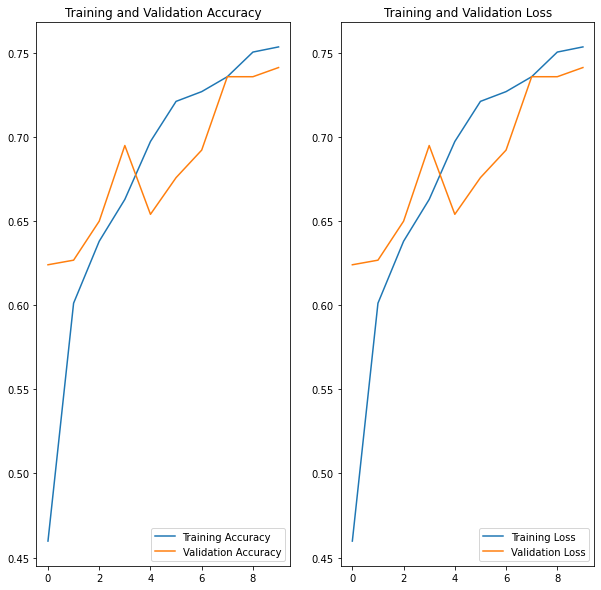

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, acc, label = 'Training Loss')
plt.plot(epochs_range, val_acc, label = 'Validation Loss')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Loss')
plt.show()

# Predict on new data

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin = sunflower_url)

img = tf.keras.utils.load_img(sunflower_path, target_size = (img_width, img_height))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print('This image most likely belongs to {} with a {:.2f} percent confidence.'.format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 104ms/step
This image most likely belongs to sunflowers with a 99.73 percent confidence.
